<a href="https://colab.research.google.com/github/Isaiah-Essien/diabetes_prediction_DLI/blob/main/new_diabetes_models_with_smote_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install tensorflow==2.12.0


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import pickle
from google.colab import drive
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Conv1D, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add, Dense, Input, Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import Concatenate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your dataset
diabetes = pd.read_csv('/content/drive/My Drive/Deep Learning Indaba Submission/disease-data/diabetes_prediction_dataset.csv')  # Replace with your dataset path

In [ ]:
# size of dataset
diabetes.shape

(100000, 9)

In [ ]:
# identify variable types
diabetes.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
#Understand various summary statistics of the data
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#Get count of values in a categorical variable
diabetes['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


In [ ]:
diabetes['diabetes'].unique()


array([0, 1])

<Axes: >

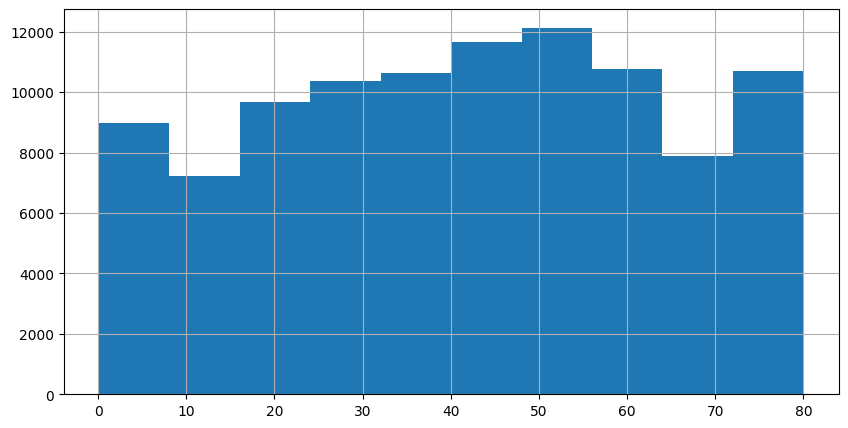

In [ ]:
diabetes.age.hist(figsize=(10,5))

In [ ]:
diabetes.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# # Scaling continues age because its a continues variable
# scaler = MinMaxScaler()
# diabetes[['age']] = scaler.fit_transform(diabetes[['age']])

# diabetes.head()

In [ ]:
diabetes['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

# Preprocessing

In [ ]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes = diabetes.replace({'smoking_history': {"never":1, "not current":2, "former":3, "current":4, "ever" : 5,  "No Info": 6 }})
diabetes = diabetes.replace({'gender': {'Female': 1, 'Male': 2, 'Other': 0}})
print(diabetes['smoking_history'].unique())
print(diabetes['gender'].unique())

[1 6 4 3 5 2]
[1 2 0]


In [ ]:
Ydiab = diabetes['diabetes']
Xdiab = diabetes.drop(['diabetes'], axis = 1)

### Function for Ploting training History

In [ ]:
def plot_training_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [ ]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,6,27.32,6.6,80,0
2,2,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


In [ ]:
# Define features (X) and target (y)
X = diabetes.drop(columns=['diabetes'])
y = diabetes['diabetes']

# # Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)



# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Traditional ML Approaches

## Logistic Regression

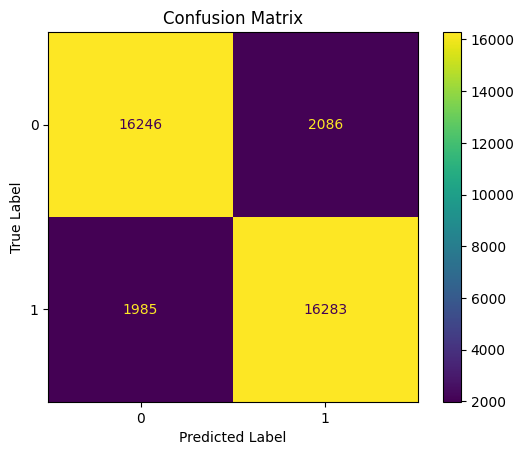

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     18332
           1       0.89      0.89      0.89     18268

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



In [ ]:
# Define and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

# Random Forest

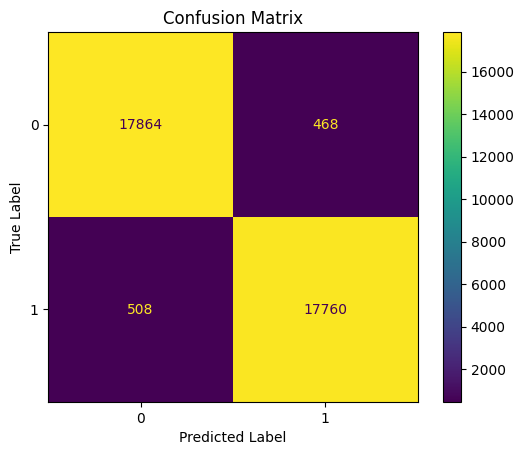

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18332
           1       0.97      0.97      0.97     18268

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Model

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf )

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)

# Plot the confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Decision Tree

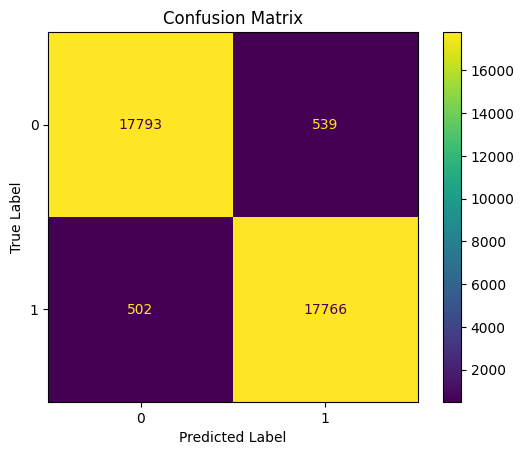

Accuracy: 0.9715573770491803
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18332
           1       0.97      0.97      0.97     18268

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate Model

# Calculate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)

# Plot the confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the Decision Tree model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Naive Bayes

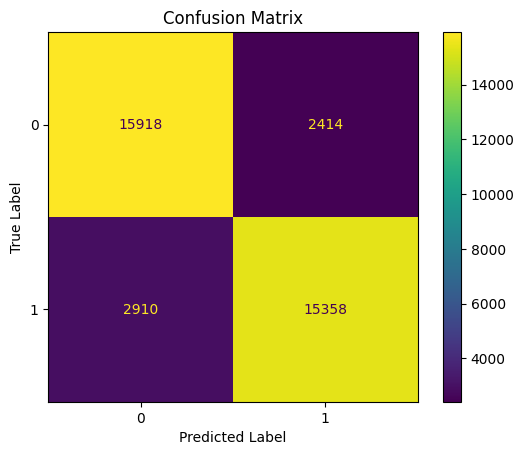

Accuracy: 0.854535519125683
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86     18332
           1       0.86      0.84      0.85     18268

    accuracy                           0.85     36600
   macro avg       0.85      0.85      0.85     36600
weighted avg       0.85      0.85      0.85     36600



In [ ]:
# Naive Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the Naive Bayes model

# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)

# Plot the confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Deep Lerning Approaches



In [ ]:
# Convert resampled data to NumPy arrays if they are still DataFrames
# Xd_resampled = np.array(Xd_resampled)
# yd_resampled = np.array(yd_resampled)

X_train = np.array(X_train)
y_train = np.array(y_train)


def create_model():
    dmodel = Sequential()

    # First layer
    dmodel.add(Dense(512, input_dim=8, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.3))

    # Hidden layers with decreasing units
    dmodel.add(Dense(256, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.2))

    dmodel.add(Dense(128, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.2))

    dmodel.add(Dense(64, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.2))

    dmodel.add(Dense(32, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.2))

    dmodel.add(Dense(16, kernel_regularizer=l2(0.01)))
    dmodel.add(BatchNormalization())
    dmodel.add(LeakyReLU(alpha=0.1))
    dmodel.add(Dropout(0.2))

    # Final output layer
    dmodel.add(Dense(1, activation='sigmoid'))

    # Compile the model with a custom learning rate
    optimizer = Adam(learning_rate=0.0001)
    dmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return dmodel


# 74 % I like this
def create_residual_cnn(input_shape=(8, 1)):
    input_layer = Input(shape=input_shape)

    # First Conv Block
    x = Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Second Conv Block with Residual Connection
    y = Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), padding='same')(x)
    y = BatchNormalization()(y)
    y = Dropout(0.2)(y)
    y = Conv1D(filters=64, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), padding='same')(y)
    y = BatchNormalization()(y)
    y = Dropout(0.2)(y)

    # Match dimensions for residual connection
    x_residual = Conv1D(filters=64, kernel_size=1, padding='same')(x)

    y = Add()([x_residual, y])  # Residual connection

    # Third Conv Block
    z = Conv1D(filters=128, kernel_size=2, activation='relu', kernel_regularizer=l2(0.01), padding='same')(y)
    z = BatchNormalization()(z)
    z = Dropout(0.2)(z)

    z = Flatten()(z)

    # Dense layers
    z = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(z)
    z = BatchNormalization()(z)
    z = Dropout(0.3)(z)

    z = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(z)
    z = BatchNormalization()(z)
    z = Dropout(0.3)(z)

    output = Dense(1, activation='sigmoid')(z)

    optimizer = Adam(learning_rate=0.0001)
    cnn_model = Model(inputs=input_layer, outputs=output)
    cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return cnn_model

# Initialize variables for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Residual CNN

1144/1144 [==============================] - 5s 4ms/step


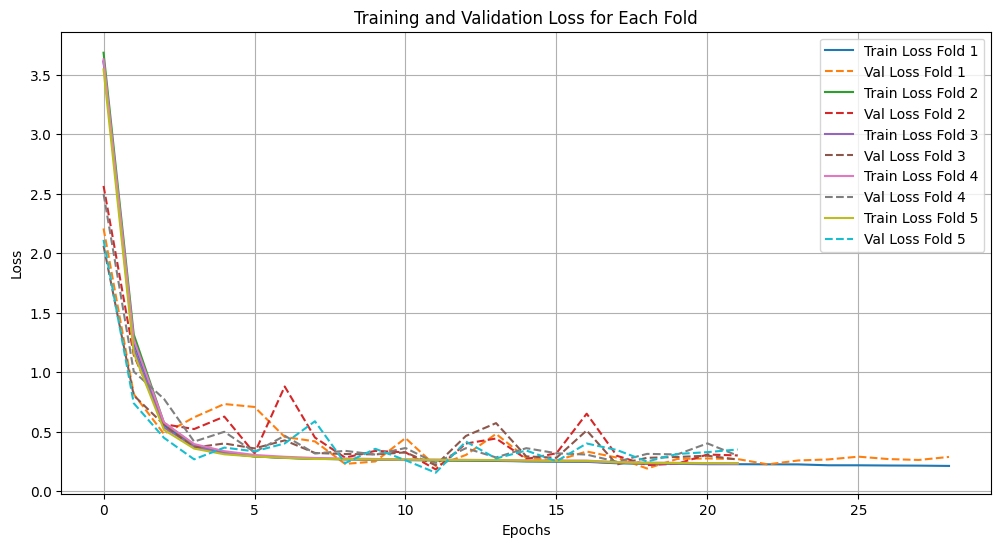

<Figure size 600x600 with 0 Axes>

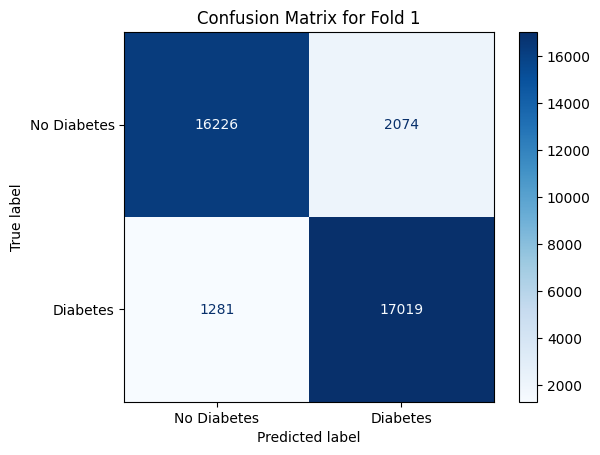

Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     18300
           1       0.84      0.96      0.90     18300

    accuracy                           0.89     36600
   macro avg       0.90      0.89      0.89     36600
weighted avg       0.90      0.89      0.89     36600



<Figure size 600x600 with 0 Axes>

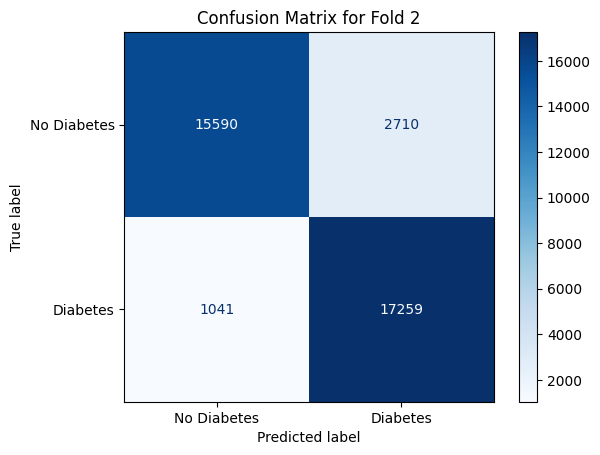

Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     18300
           1       0.84      0.96      0.90     18300

    accuracy                           0.89     36600
   macro avg       0.90      0.89      0.89     36600
weighted avg       0.90      0.89      0.89     36600



<Figure size 600x600 with 0 Axes>

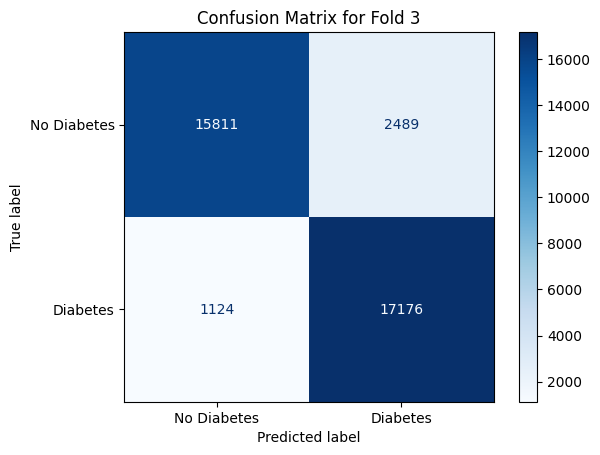

Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     18300
           1       0.84      0.96      0.90     18300

    accuracy                           0.89     36600
   macro avg       0.90      0.89      0.89     36600
weighted avg       0.90      0.89      0.89     36600



<Figure size 600x600 with 0 Axes>

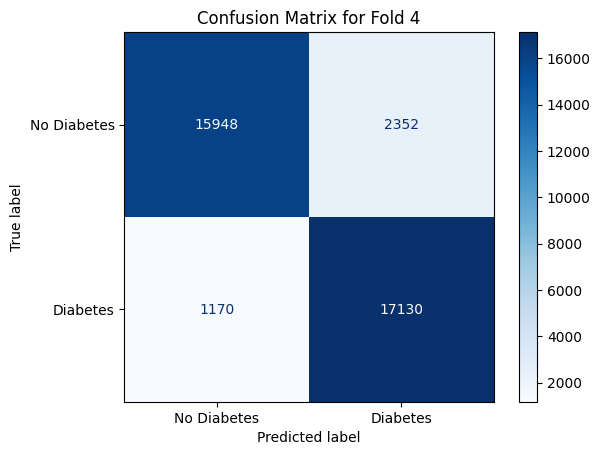

Classification Report for Fold 4:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     18300
           1       0.84      0.96      0.90     18300

    accuracy                           0.89     36600
   macro avg       0.90      0.89      0.89     36600
weighted avg       0.90      0.89      0.89     36600



<Figure size 600x600 with 0 Axes>

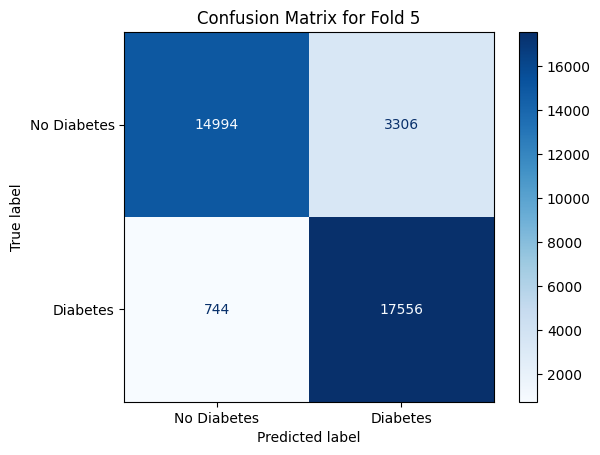

Classification Report for Fold 5:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     18300
           1       0.84      0.96      0.90     18300

    accuracy                           0.89     36600
   macro avg       0.90      0.89      0.89     36600
weighted avg       0.90      0.89      0.89     36600



In [ ]:

history_list_cnn = []
confusion_matrices_cnn = []

# Manual cross-validation
for train_index, test_index in kfold.split(X, y):
    # X_train, X_test = Xd_resampled[train_index], Xd_resampled[test_index]
    # y_train, y_test = yd_resampled[train_index], yd_resampled[test_index]
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the model
    model = create_residual_cnn()

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    history = model.fit(X_train, y_train,
                        epochs=500,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0, callbacks=[early_stopping, reduce_lr])  # Set verbose to 0 to suppress output

    # Store the history for plotting
    history_list_cnn .append(history)

    # Make predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices_cnn.append(cm)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
for i, history in enumerate(history_list_cnn):
    plt.plot(history.history['loss'], label=f'Train Loss Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Display confusion matrices for each fold
cm_plot_labels = ['No Diabetes', 'Diabetes']  # Replace with your actual labels

for i, cm in enumerate(confusion_matrices_cnn):
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {i + 1}')


    plt.show()

    # Print classification report for each fold
    print(f'Classification Report for Fold {i + 1}:\n')
    print(classification_report(y_test, y_pred))

# MLP

625/625 [==============================] - 2s 2ms/step


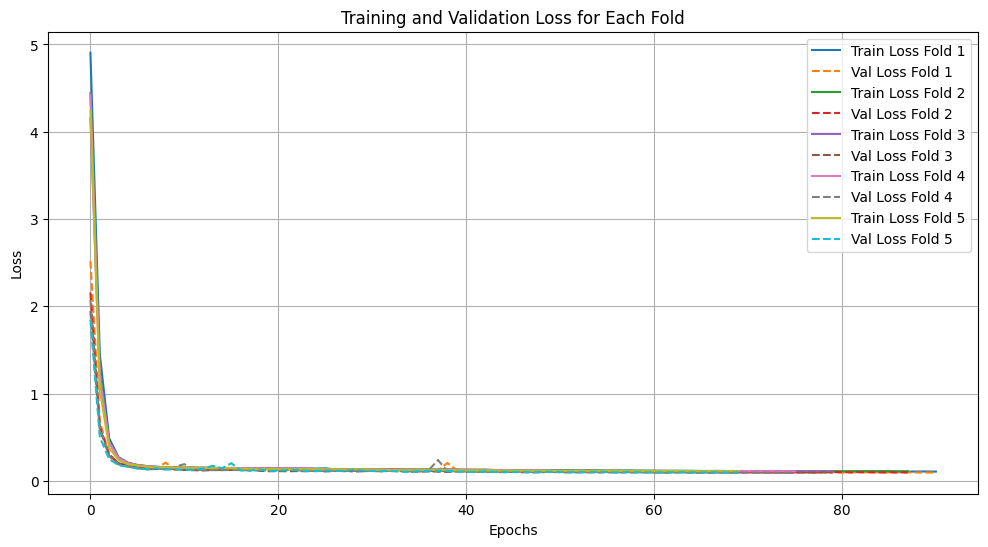

<Figure size 600x600 with 0 Axes>

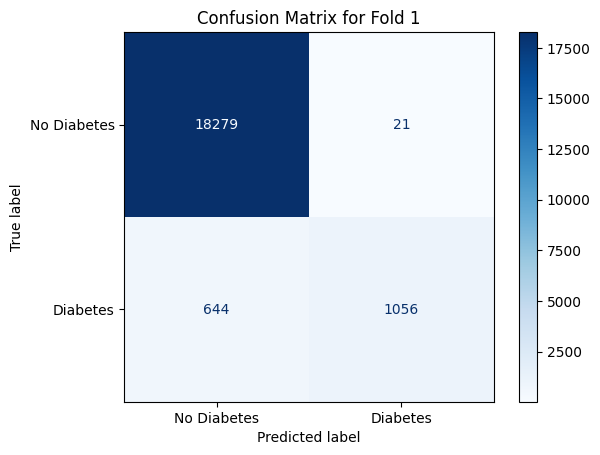

Classification Report for Fold 1:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.63      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.88     20000
weighted avg       0.97      0.97      0.97     20000



<Figure size 600x600 with 0 Axes>

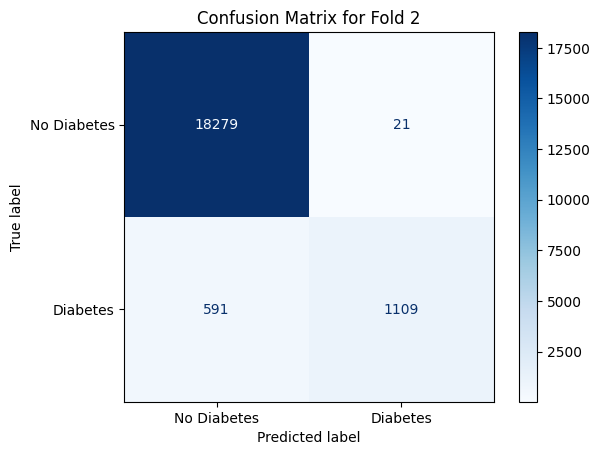

Classification Report for Fold 2:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.63      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.88     20000
weighted avg       0.97      0.97      0.97     20000



<Figure size 600x600 with 0 Axes>

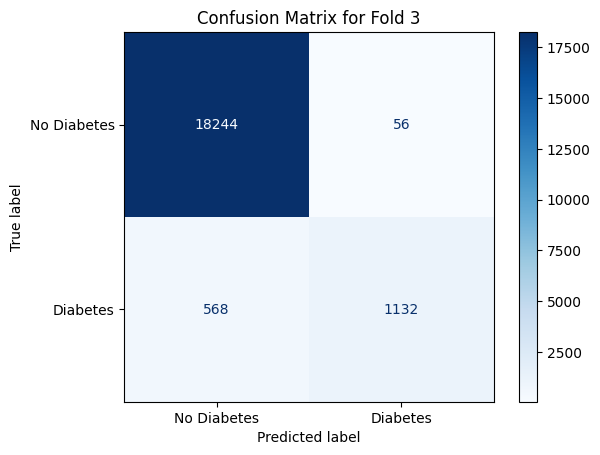

Classification Report for Fold 3:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.63      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.88     20000
weighted avg       0.97      0.97      0.97     20000



<Figure size 600x600 with 0 Axes>

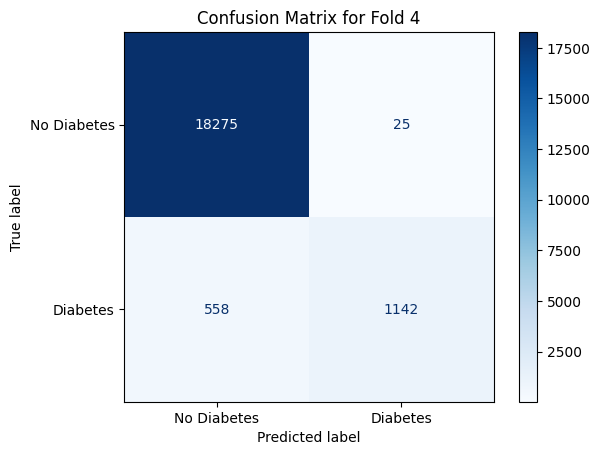

Classification Report for Fold 4:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.63      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.88     20000
weighted avg       0.97      0.97      0.97     20000



<Figure size 600x600 with 0 Axes>

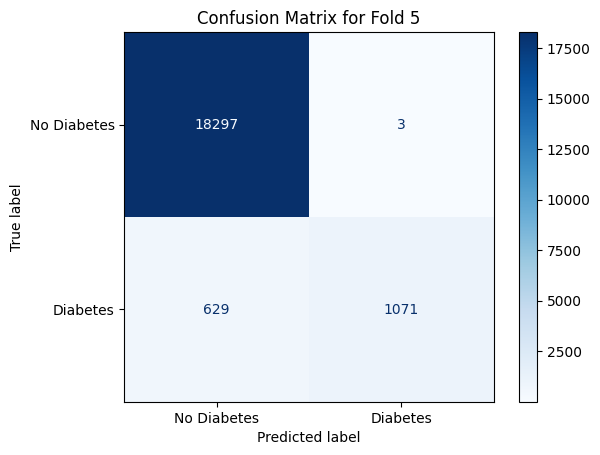

Classification Report for Fold 5:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       1.00      0.63      0.77      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.88     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
history_list = []
confusion_matrices = []

# Manual cross-validation
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the model
    model = create_model()

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    history = model.fit(X_train, y_train,
                        epochs=500,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0, callbacks=[early_stopping, reduce_lr])  # Set verbose to 0 to suppress output

    # Store the history for plotting
    history_list.append(history)

    # Make predictions on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
for i, history in enumerate(history_list):
    plt.plot(history.history['loss'], label=f'Train Loss Fold {i+1}')
    plt.plot(history.history['val_loss'], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Display confusion matrices for each fold
cm_plot_labels = ['No Diabetes', 'Diabetes']  # Replace with your actual labels

for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {i + 1}')


    plt.show()

    # Print classification report for each fold
    print(f'Classification Report for Fold {i + 1}:\n')
    print(classification_report(y_test, y_pred))

# Model Comparison

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

models_ = pd.read_csv(io.StringIO('''
Model,Accuracy,Recall,F1_score
MLP,0.97,1.00,0.98
Residual CNN,0.89,0.82,0.88
Random Forest,0.97,0.97,0.97
Decision Tree,0.97,0.97,0.97
Logistic Regression,0.89,0.89,0.89
Naive Bayes,0.85,0.87,0.86
'''))

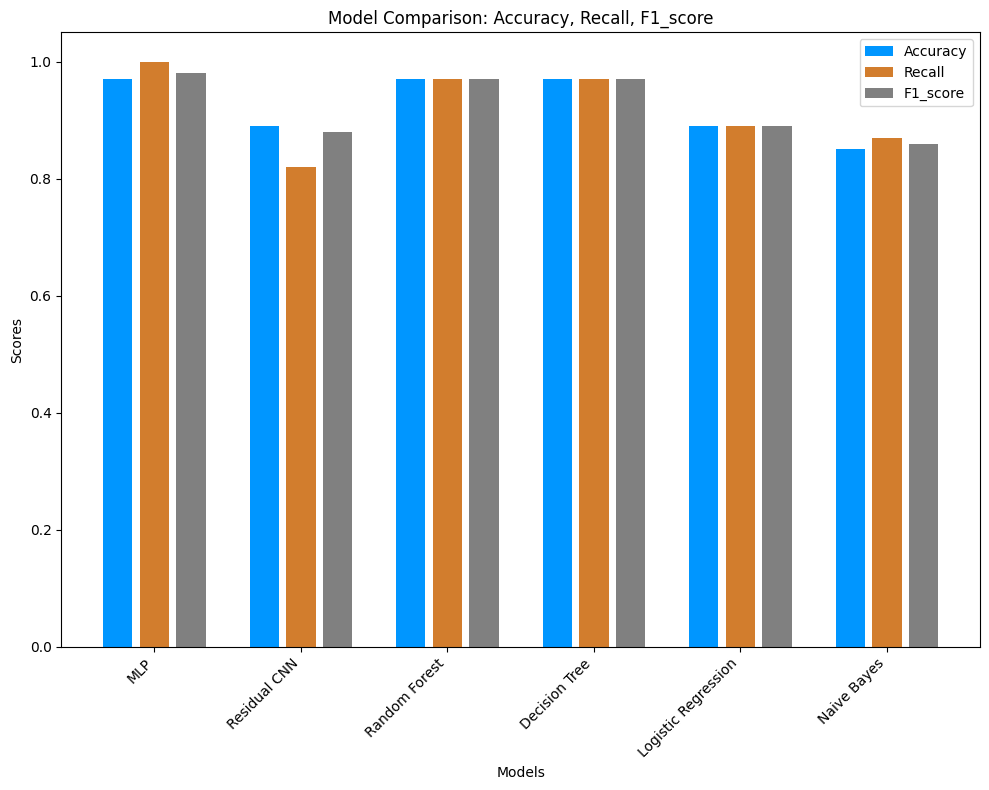

In [ ]:
categories = ['Accuracy', 'Recall', 'F1_score']
models = models_['Model']


colors = ['#0096FF', '#D27D2D', '#808080']


bar_width = 0.2
index = np.arange(len(models))  # Positions for the groups of bars


fig, ax = plt.subplots(figsize=(10, 8))


for i, (category, color) in enumerate(zip(categories, colors)):
    ax.bar(index + i * bar_width + i * 0.05, models_[category], bar_width, label=category, color=color)


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Recall, F1_score')
ax.set_xticks(index + bar_width * (len(categories) - 1) / 2 + 0.05)
ax.set_xticklabels(models, rotation=45, ha="right")

ax.legend()

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Feature Importance

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: \n{coef}")

gender: 
0.014294554441749803
age: 
0.0014097000867287525
hypertension: 
0.09622852893839484
heart_disease: 
0.1174369690548819
smoking_history: 
-0.0018303217901694856
bmi: 
0.004192912989212861
HbA1c_level: 
0.08102021410580966
blood_glucose_level: 
0.0022733178762674834


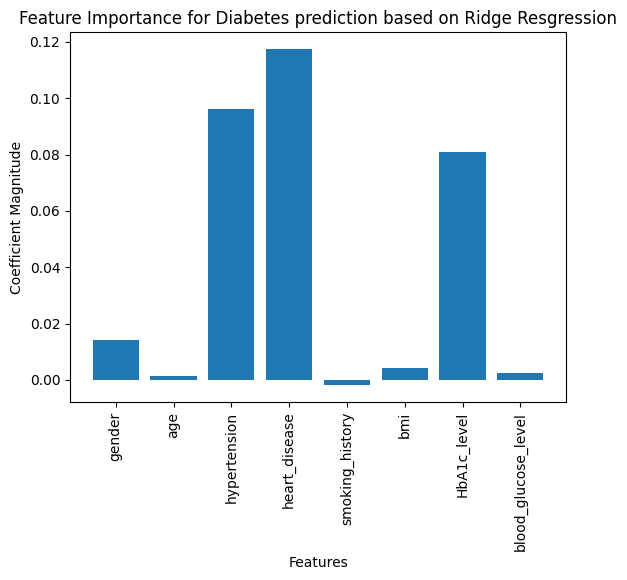

In [ ]:
plt.bar(X.columns, ridge_model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance for Diabetes prediction based on Ridge Resgression')
plt.xticks(rotation=90)
plt.savefig('feature_importance_ridge.png')
plt.show()